In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
from scipy.sparse import dok_matrix
import multiprocessing as mp
import scipy as sp
import matplotlib.ticker as ticker
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})
plt.rcParams.update({"axes.titlesize": 18})
plt.rcParams.update({"axes.labelsize": 15})

In [3]:
params_ML_hopf = project.utils.load_ML(psi=0.04,gna=4.4,V3=2,V4=30,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_SNLC = project.utils.load_ML(psi=0.067,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)
params_ML_homoclinic = project.utils.load_ML(psi=0.23,gna=4,V3=12,V4=17.4,Ena=120,Ek=-84,Eshunt=-60,gk=8,gshunt=2,V1=-1.2,V2=18,C=20)

k_ML = 0.0
Isyn =0 #delta peak of the chemical synapse
Is = 0
tau = 1 #time constant for the chemical coupling equations
#time parameters
t_final = 600
dt = 0.01
num_neurons=5

#filtering order
order = 2
y0 = -60 * np.ones(num_neurons)
w0 = np.zeros(num_neurons)




I_hopf = np.zeros((int(t_final/dt),num_neurons))
I_SNLC= np.zeros((int(t_final/dt),num_neurons))
I_homoclinic = np.zeros((int(t_final/dt),num_neurons))

#Creating the Electrical and Chemical connectivity matrices, in this case for 10 neurons
E_matrix,seed, ratio = project.utils.create_matrix('random',num_neurons,synapse_type='electrical',connection_fraction=1)
C_matrix, seed, ratio = project.utils.create_matrix('random',num_neurons,connection_fraction=1)

for i in range(0,num_neurons):
    I_hopf[:,i] = 90
    I_SNLC[:,i] = 50
    I_homoclinic[:,i] = 45


data_hopf, complete_hopf, matrix_hopf, synaptic_hopf = project.models.ML_Neuron_Network(dt,t_final,2,y0,w0,*params_ML_hopf,I_hopf,Is,k_ML,tau,E_matrix,C_matrix)
data_SNLC, complete_SNLC, matrix_SNLC, synaptic_SNLC = project.models.ML_Neuron_Network(dt,t_final,2,y0,w0,*params_ML_SNLC,I_SNLC,Is,k_ML,tau,E_matrix,C_matrix)
data_homoclinic, complete_homoclinic, matrix_homoclinic, synaptic_homoclinic = project.models.ML_Neuron_Network(dt,t_final,2,y0,w0,*params_ML_homoclinic,I_homoclinic,Is,k_ML,tau,E_matrix,C_matrix)

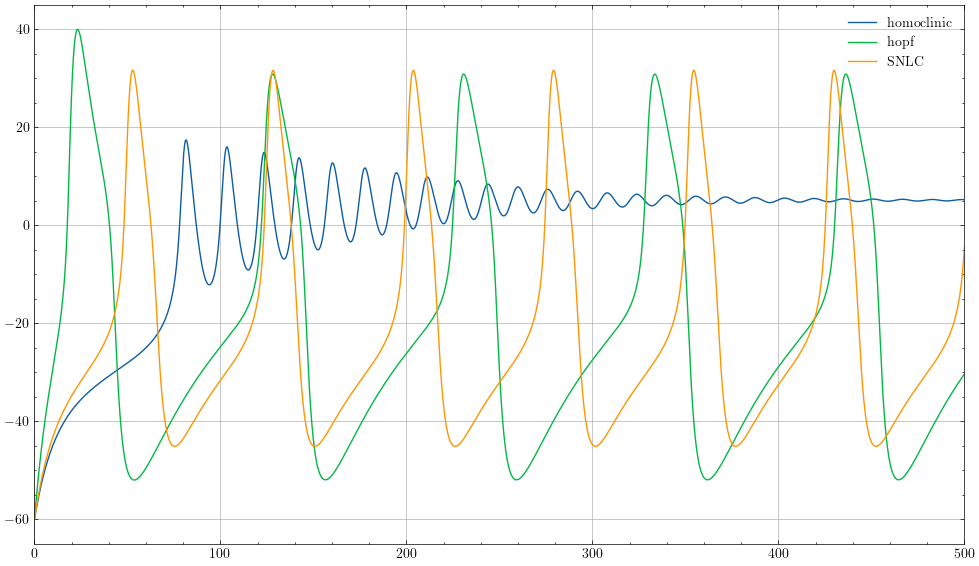

In [4]:
time = np.linspace(0,t_final,int(t_final/dt),)

plt.xlim(0,500)
plt.plot(time,data_homoclinic[:,4],label = 'homoclinic')
plt.plot(time,data_hopf[:,4], label = 'hopf')
plt.plot(time,data_SNLC[:,4], label = 'SNLC')
plt.legend()

In [150]:
#time constants
dt = 0.01
t_final = 600
k_ML_1 = 0.064
k_ML_2 = 0.063

#fixing random seed
np.random.seed(1234)

#generating the intensities
I_hopf = np.zeros((int(t_final/dt),num_neurons))
I_homoclinic = np.zeros((int(t_final/dt),num_neurons))
I_SNLC = np.zeros((int(t_final/dt),num_neurons))


for i in range(15000,40000):
    I_hopf[i,0] =10
    I_homoclinic[i,0] = 10
    I_SNLC[i,0] = 10

data_hopf, complete_hopf, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_hopf,I_hopf,Is,k_ML_2,tau)
data_SNLC, complete_SNLC, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_SNLC,I_SNLC,Is,k_ML_1,tau)
data_homoclinic, complete_homoclinic, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML_homoclinic,I_homoclinic,Is,k_ML_1,tau)

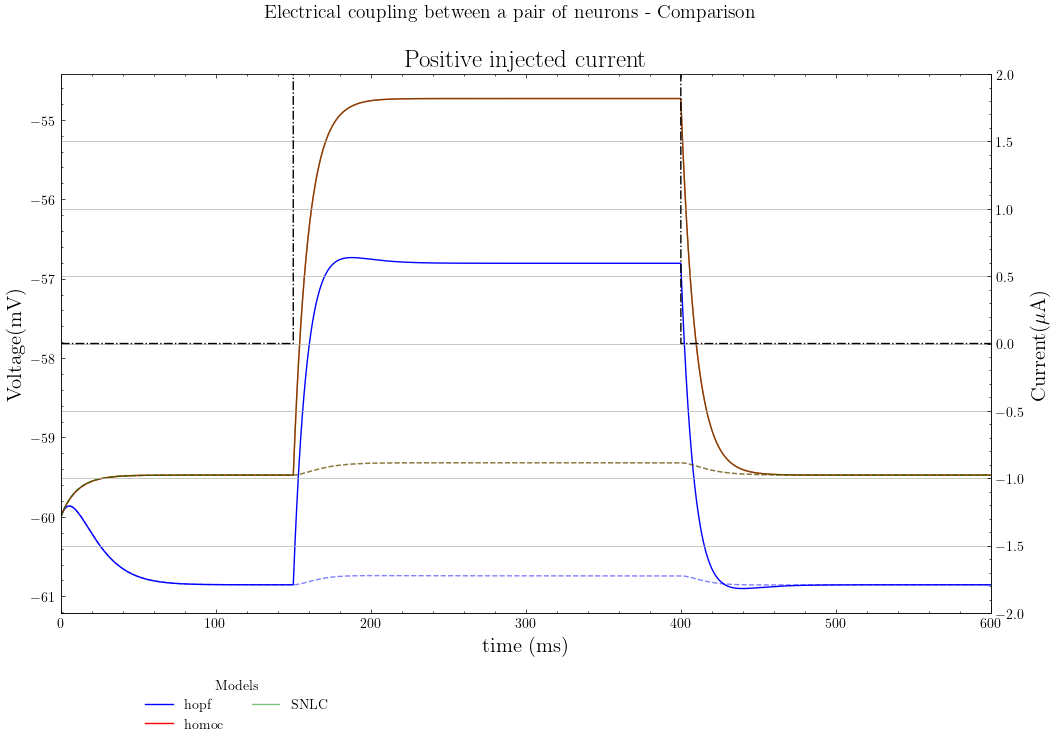

In [151]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1) = plt.subplots(1,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage(mV)')
ax1.tick_params(axis = 'y')


ax3 = ax1.twinx()
ax1.title.set_text('Positive injected current')

color = 'black'

ax3.set_ylabel(r'Current($\mu$A)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)

ax3.set_ylim(-2,2)

fig.suptitle('Electrical coupling between a pair of  neurons - Comparison',fontsize=14)
ax1.set_xlim(0,600)
lns1 = ax1.plot(time,data_hopf[:,0], label = 'hopf', color = 'b')
lns2 = ax1.plot(time,data_homoclinic[:,0], label = 'homoc', color = 'r' )
lns3 = ax1.plot(time,data_hopf[:,1], 'b--', alpha = 0.5)
lns4 = ax1.plot(time,data_homoclinic[:,1], 'r--', alpha = 0.5)
lns5 = ax1.plot(time,data_SNLC[:,0], label = 'SNLC', color = 'g', alpha = 0.5)
lns6 = ax1.plot(time,data_SNLC[:,1], 'g--', alpha = 0.5)
lnsc = ax3.plot(time,I_hopf[:,0],'-.', color = 'black')


ax1.grid()
ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 2 )
plt.show()

In [152]:
El = -60.95
variation_hopf = np.zeros((len(data_hopf[:,0]),1))
deltav1 = np.array(abs(El-data_hopf[:,0]))
deltav2 = np.array(abs(El-data_hopf[:,1]))
gj_transmission = deltav2 / deltav1
variation_hopf[:,0] = gj_transmission


El = -59.56
variation_SNLC = np.zeros((len(data_SNLC[:,0]),1))
deltav1 = np.array(abs(El-data_SNLC[:,0]))
deltav2 = np.array(abs(El-data_SNLC[:,1]))
gj_transmission = deltav2 / deltav1
variation_SNLC[:,0] = gj_transmission

variation_homoc = np.zeros((len(data_homoclinic[:,0]),1))
deltav1 = np.array(abs(El-data_homoclinic[:,0]))
deltav2 = np.array(abs(El-data_homoclinic[:,1]))
gj_transmission = deltav2 / deltav1
variation_homoc[:,0] = gj_transmission

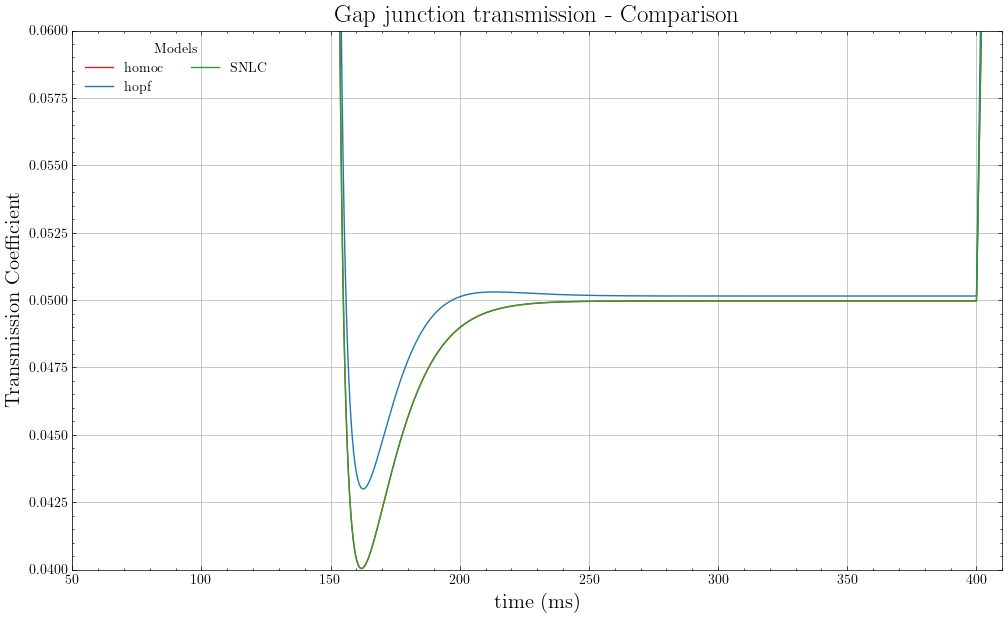

In [153]:
t_final = 600
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('time (ms)')
plt.ylabel('Transmission Coefficient')

plt.xlim(50,410)
plt.ylim(0.04,0.06)

plt.plot(time,variation_homoc, color = 'tab:red', label = 'homoc')
plt.plot(time,variation_hopf, color = 'tab:blue' ,label = 'hopf')
plt.plot(time,variation_SNLC, color = 'tab:green',label = 'SNLC')
plt.title('Gap junction transmission - Comparison')
plt.legend(title='Models',ncols=2)